## Regressão binária

In [7]:
import numpy as np

In [2]:
def zScoreScale(x, y):
    data = np.c_[x,y]
    mean = data.mean()
    sig = np.sqrt(((data - mean)**2).sum())
    scaled_x = np.zeros(x.shape)
    
    scaled_data = (data - mean)/sig
    scaled_y = (scaled_data[:,len(scaled_data[0])-1]).reshape(-1,1)
    for i in range(x.shape[1]):
        scaled_x[:,i] = scaled_data[:,i]
    return scaled_x, scaled_y, mean, sig

def zScoreDescale(x, y, mean, sig):
    scaled_data = np.c_[x,y]
    descaled_data = scaled_data * sig + mean
    
    descaled_x = np.zeros(x.shape)
    descaled_y = (descaled_data[:,len(descaled_data[0])-1]).reshape(-1,1)
    for i in range(x.shape[1]):
        descaled_x[:,i] = descaled_data[:,i]
        
    return descaled_x, descaled_y, mean, sig

In [53]:
def GD_Logistico(x, y, alpha = 0.1, lamb = 0, max_iterations = 10):
    
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    n = len(y)
    x = np.c_[np.ones(n), x]
    w = np.zeros(x.shape[1]).reshape(-1,1)
    yhat = np.zeros(n).reshape(-1,1)
    e = np.zeros(n).reshape(-1,1)
    
    for t in range(max_iterations):
        yhat = sigmoid(x @ w)
        e = y - yhat
        w[0] = w[0] + (alpha/n * e.sum())
        for column in range(1, len(w)):
            w[column] += alpha * ((e * x[:,[column]]).sum()/n - lamb * w[column])
                
    MSE = ((e ** 2).sum())/(2*n)
    return w, MSE

In [54]:
def classBin(w, x):
        
    n = len(x[:, 0])
    x = np.c_[np.ones(n), x]
    y = x @ w
    return np.sign(y)

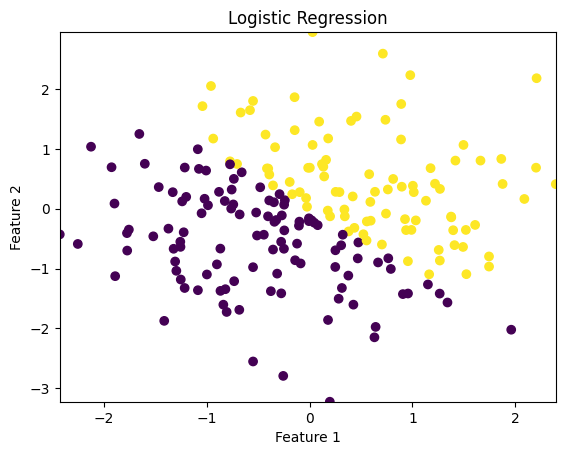

array([[-1.],
       [-1.]])

In [66]:

np.random.seed(123)
x = np.random.normal(size=(200, 2))
y = (x_train[:, 0] + x_train[:, 1] > 0).astype(int) * 2 - 1

w, MSE = GD_Logistico(x, y, max_iterations = 100)

# Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=y)

# Plot the decision boundary
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
xx = np.c_[xx1.ravel(), xx2.ravel()]
yy = classBin(w, xx).reshape(xx1.shape)
plt.contour(xx1, xx2, yy, colors='k', levels=[0], alpha=0.5)

# Set the axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')

# Show the plot
plt.show()

classBin(w, x_teste)

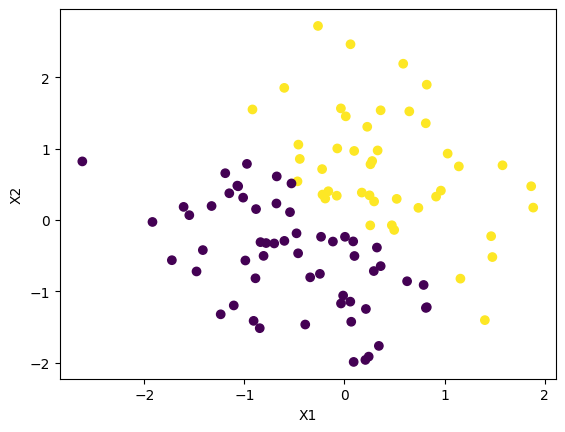

ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,100)

In [46]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    """Compute the sigmoid function"""
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, alpha=0.01, num_iterations=1000, add_intercept=True):
    """Logistic regression using gradient descent"""
    
    # Add an intercept term to X if requested
    if add_intercept:
        X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Initialize theta to a vector of zeros
    theta = np.zeros((X.shape[1], 1))
    
    # Run gradient descent
    for i in range(num_iterations):
        # Compute the predicted probabilities
        h = sigmoid(X.dot(theta))
        
        # Compute the gradient of the cost function with respect to theta
        grad = X.T.dot(h - y) / y.size
        
        # Update theta
        theta -= alpha * grad
    
    return theta

# Generate some random data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Run logistic regression on the data
theta = logistic_regression(X, y)

# Print the learned parameters
print('Learned parameters:', theta)

# Plot the decision boundary
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
X_grid = np.hstack((xx1.reshape(-1, 1), xx2.reshape(-1, 1)))
X_grid = np.hstack((np.ones((X_grid.shape[0], 1)), X_grid))
y_pred = sigmoid(X_grid.dot(theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, y_pred, levels=[0.5], colors='r')
plt.show()